In [1]:
import tensorflow as tf
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Dropout, MaxPooling2D, Flatten, RandomFlip, RandomRotation, Rescaling,Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.models import Sequential
from tensorflow.keras import models,layers

In [3]:
!python -m pip install pillow


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from PIL import Image

In [21]:
img_data_skip =0
for folder_name in('Cat','Dog'):
    folder_path=os.path.join("PetImages",folder_name)
    for f_name in os.listdir(folder_path):
        f_path =os.path.join(folder_path,f_name)
        try:
            img_bytes=tf.io.read_file(f_path)
            tf.io.decode_image(img_bytes)
           
        except Exception as e:
            print(f"Bad file found and deleted on {f_path}")
            img_data_skip +=1
            os.remove(f_path)

print(f"picture deleted due to corrupt {img_data_skip}")

picture deleted due to corrupt 0


In [30]:
directory ='PetImages'
train_data=tf.keras.utils.image_dataset_from_directory(
    directory,
    subset='training',
    seed=1345,
    validation_split =0.2,
    image_size=(180,180),
    batch_size=40
)
val_data =tf.keras.utils.image_dataset_from_directory(
    directory,
    subset='validation',
    seed=1345,
    image_size=(180,180),
    validation_split=0.2,
    batch_size =40

)

Found 24991 files belonging to 2 classes.
Using 19993 files for training.
Found 24991 files belonging to 2 classes.
Using 4998 files for validation.


In [31]:
first_model=Sequential([
    Input(shape=(180,180,3)),
    Rescaling(1./255),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    Conv2D(32,3,activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,activation='relu'),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])
first_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
first_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_1 (RandomFlip)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 180, 180, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 41, 41, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 107584)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │     3,442,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,499,073 (13.35 MB)

 Trainable params: 3,499,073 (13.35 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
first_model.fit(train_data,
validation_data=val_data,
epochs=10,
callbacks=[EarlyStopping(monitor='val_accuracy',patience=3),ModelCheckpoint('best_cat_and_dog_model.keras',save_best_only=True,monitor='val_loss')],
verbose=1)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1140s 2s/step - accuracy: 0.5010 - loss: 0.7237 - val_accuracy: 0.4986 - val_loss: 0.6932
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1487s 3s/step - accuracy: 0.4974 - loss: 0.6932 - val_accuracy: 0.4986 - val_loss: 0.6932
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1767s 4s/step - accuracy: 0.4998 - loss: 0.6941 - val_accuracy: 0.4986 - val_loss: 0.6932
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 753s 1s/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.4986 - val_loss: 0.6932


In [27]:
model=tf.keras.models.load_model("best_cat_and_dog_model.keras")

In [28]:
img =tf.keras.utils.load_img('dog_6.jpg',target_size=(180,180,3))
img_array =tf.keras.utils.img_to_array(img)
img_batch =np.expand_dims(img_array,axis=0)
pred=model.predict(img_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [29]:
if pred[0][0] <0.5:
    print(f"we are {pred[0][0]*100 :.2f} that it is a cat!!")
else:
    print(f"we are {pred[0][0]*100 :.2f} that it is a dog")

we are 49.85 that it is a cat!!


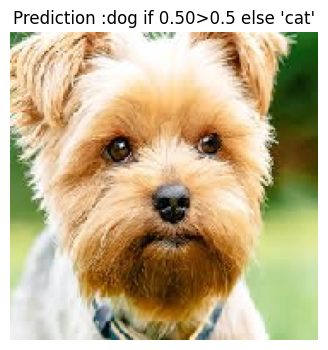

In [36]:
plt.figure(figsize=(6,4))
plt.plot()
plt.imshow(img)
plt.title(f"Prediction :dog if {pred[0][0] :.2f}>0.5 else 'cat'")
plt.axis('off')
plt.show()